In [2]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Problem Statement: The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [3]:
#Loading datasets

df1 = pd.read_csv("C:\\Users\\ronit\\Downloads\\application_data.csv")      #Application data
df2 = pd.read_csv("C:\\Users\\ronit\\Downloads\\previous_application.csv")   #Previous Application Data

In [4]:
df1.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df2.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


Superficial Analysis, in-order to understand the data and get some information.

In [6]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
df1.shape, df2.shape

((307511, 122), (1670214, 37))

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
df1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

As we can observe, there are many columns with missing values, dropping those columns which have >40%(High Tolerance) missing values will be dropped. This will reduce the computation time and also help us with easy analysis.

In [11]:
# Calculate the percentage of missing values
data_missing_percentage = (df1.isnull().sum() / len(df1)) * 100

# Filter the columns where the missing percentage is greater than 30%
dropcolumns = data_missing_percentage[data_missing_percentage > 40].index.tolist()


In [12]:
df = df1.drop(dropcolumns, axis =1)

In [13]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Now that the columns with the most amount of missing values are dropped, I will now drop those columns which will not be much useful in segmenting the customers according to their risk of loan default.

In [14]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [15]:
df = df.drop(df[["NAME_TYPE_SUITE","REGION_POPULATION_RELATIVE",'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','FLAG_MOBIL',
            'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
            'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
            'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
            'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']], axis=1)
            

In [16]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object')

In [17]:
df.FLAG_DOCUMENT_2.value_counts()

FLAG_DOCUMENT_2
0    307498
1        13
Name: count, dtype: int64

FLAG_DOCUMENT_2 has only 13 rows with value 1, checking for all flag document columns:

In [18]:
df.columns[23:43]

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

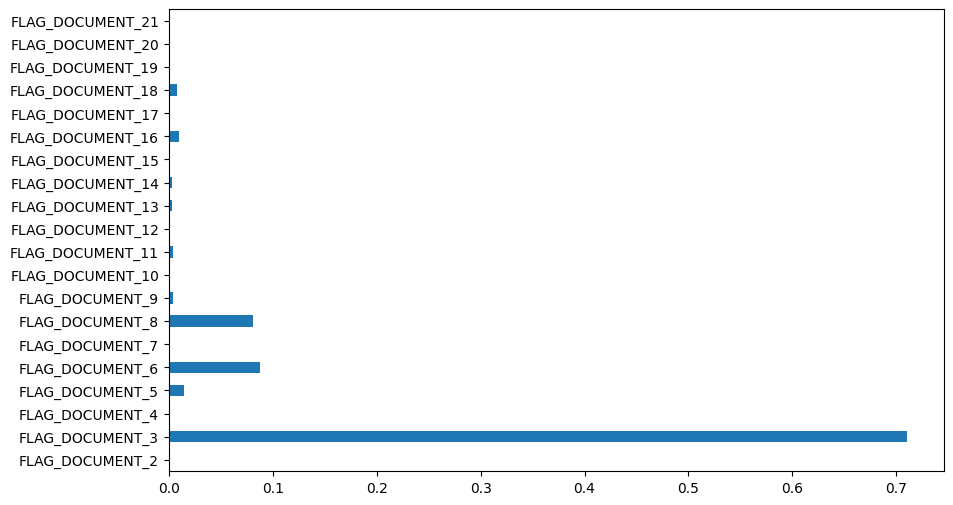

In [19]:
df.iloc[:, 23:43].mean().plot(kind='barh', figsize=(10,6))
plt.show()

After plotting the average values for flag document columns, it is observed all of them but flag document 3 has an average value of 0, furthermore since the information conveyed by these columns i.e whether client provide the particular form type is not useful for exploratory data analysis, i will continue to drop all flag document columns.

In [20]:
df = df.drop(df.columns[23:43], axis=1)

In [21]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,House / apartment,-637,Laborers,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,House / apartment,-1188,Core staff,2.0,1,1,School,0.622246,NaN,0.0


Now that only the columns identified to be useful remain, we can begin Data Cleaning.

In [22]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_QRT      41519
dtype: int64

In [23]:
df.shape

(307511, 24)

In [24]:
12/307511,278/307511

(3.9022994299390916e-05, 0.0009040327012692228)

Columns AMT_ANNUITY,AMT_GOODS_PRICE and CNT_FAM_MEMBERS have very less % of null values compared hence it will be safe to drop these rows

In [25]:
df = df.dropna(subset=["AMT_ANNUITY","AMT_GOODS_PRICE","CNT_FAM_MEMBERS"])

In [26]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                96334
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                     659
EXT_SOURCE_3                   60896
AMT_REQ_CREDIT_BUREAU_QRT      41472
dtype: int64

Next, Occupation type since ~30% values are null it wont be appropriate to drop them straightaway, Occupation column will be analysed further to finally decide what should be done with the missing values

In [27]:
df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55132
Sales staff              32063
Core staff               27530
Managers                 21347
Drivers                  18589
High skill tech staff    11370
Accountants               9801
Medicine staff            8527
Security staff            6712
Cooking staff             5939
Cleaning staff            4648
Private service staff     2648
Low-skill Laborers        2092
Waiters/barmen staff      1346
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   525
Name: count, dtype: int64

In [28]:
df.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [29]:
df.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

No imputation can be performed with OCCUPATION_TYPE as replacing it with the most freqeuent value (mode) may introduce a bias and since there is another column called NAME_INCOME_TYPE that describes the main source of income, for now OCCUPATION_TYPE will be ignored since removing that column gets rid of useful data for the other columns

In [30]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,House / apartment,-637,Laborers,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,House / apartment,-1188,Core staff,2.0,1,1,School,0.622246,NaN,0.0


In [31]:
df.shape

(307221, 24)

In [32]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                96334
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                     659
EXT_SOURCE_3                   60896
AMT_REQ_CREDIT_BUREAU_QRT      41472
dtype: int64

In [33]:
df[["EXT_SOURCE_2","EXT_SOURCE_3","AMT_REQ_CREDIT_BUREAU_QRT"]].describe()

,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT
count,3.065620e+05,246325.000000,265749.000000
mean,5.143913e-01,0.510885,0.265525
std,1.910704e-01,0.194849,0.794250
min,8.173617e-08,0.000527,0.000000
25%,3.924379e-01,0.370650,0.000000
50%,5.659722e-01,0.535276,0.000000
75%,6.636269e-01,0.669057,0.000000
max,8.549997e-01,0.896010,261.000000


for EXT_SOURCE_2 very less number of values are missing and the median and mean values are also similar, i.e symmterically distributed hence a mean imputation should be the best course of action.

In [34]:
df.EXT_SOURCE_2.fillna(df.EXT_SOURCE_2.mean(), inplace=True) 
import warnings
warnings.filterwarnings('ignore')

C:\Users\ronit\AppData\Local\Temp\ipykernel_22424\314921452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.EXT_SOURCE_2.fillna(df.EXT_SOURCE_2.mean(), inplace=True)


For EXT_SOURCE_3 a median imputation will be performed, as a median imputation is robus an

In [35]:
df.EXT_SOURCE_3.fillna(df.EXT_SOURCE_3.median(), inplace = True)
warnings.filterwarnings('ignore')

In [36]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                96334
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                       0
EXT_SOURCE_3                       0
AMT_REQ_CREDIT_BUREAU_QRT      41472
dtype: int64

AMT_REQ_CREDIT_BUREAU_QRT should be a important variable in considering risk analytics

In [37]:
df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)

AMT_REQ_CREDIT_BUREAU_QRT
0.0      0.809828
1.0      0.127331
2.0      0.054186
3.0      0.006457
4.0      0.001791
5.0      0.000241
6.0      0.000105
8.0      0.000026
7.0      0.000026
261.0    0.000004
19.0     0.000004
Name: proportion, dtype: float64

In [38]:
df.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265749.000000
mean          0.265525
std           0.794250
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

since the mean and median are same also almost 80% of the values are 0, the missing values will be imputed by 0

In [39]:
df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0, inplace=True)

In [40]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                96334
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                       0
EXT_SOURCE_3                       0
AMT_REQ_CREDIT_BUREAU_QRT          0
dtype: int64

I have decided to drop occupation_type column to make the analysis easier, also ORGANIZATION_TYPE and NAME_INCOME_TYPE columns also tell us about the information about the clients income and occupation 

In [41]:
df = df.drop(["OCCUPATION_TYPE"],axis=1)

In [42]:
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_EMPLOYED                  0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
AMT_REQ_CREDIT_BUREAU_QRT      0
dtype: int64

Now that we have clean data. We can begin with analysis

UNIVARIATE ANALYSIS

In [43]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object')

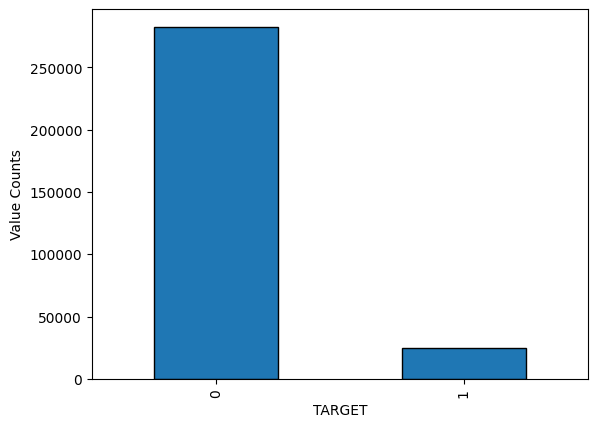

In [44]:
df['TARGET'].value_counts().plot(kind='bar',edgecolor="black")
plt.ylabel("Value Counts")
plt.show()

For TARGET column; 1- If client has payment difficulties 0 in any other case. Therefore, we can observe that there are many less people with payment difficulties compared to people who dont

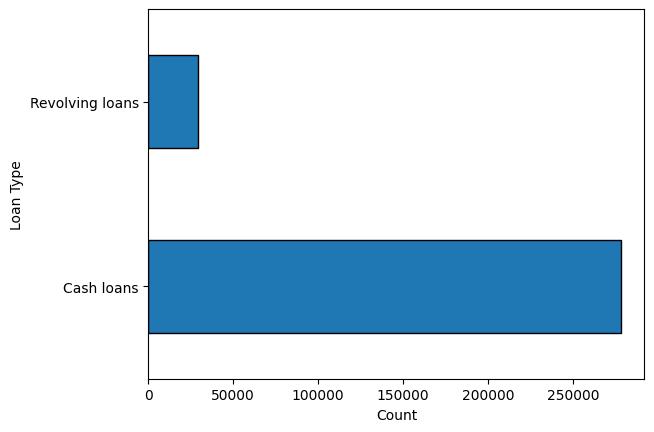

In [45]:
df.NAME_CONTRACT_TYPE.value_counts().plot.barh(edgecolor="black")
plt.ylabel("Loan Type")
plt.xlabel("Count")
plt.show()

There are more Cash Loans than Revolving Loans.
1. Cash loans are typically lump-sum amounts borrowed by an individual or business that must be repaid over a specified term, usually through fixed installments.
2. Revolving loans allow borrowers to access credit up to a certain limit, withdraw funds, repay, and withdraw again as needed.

In [46]:
df.CODE_GENDER.value_counts()

CODE_GENDER
F      202251
M      104966
XNA         4
Name: count, dtype: int64

Dropping rows with gender as XNA as it is not useful for analysis

In [47]:
df = df[df['CODE_GENDER'] != 'XNA']

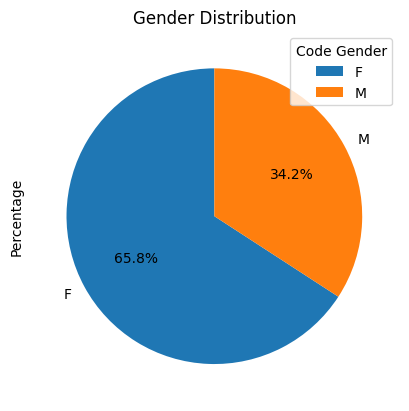

In [48]:
df.CODE_GENDER.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.ylabel("Percentage")
plt.legend(title='Code Gender')
plt.show()

There are significantly more Females than Males in the Loan data

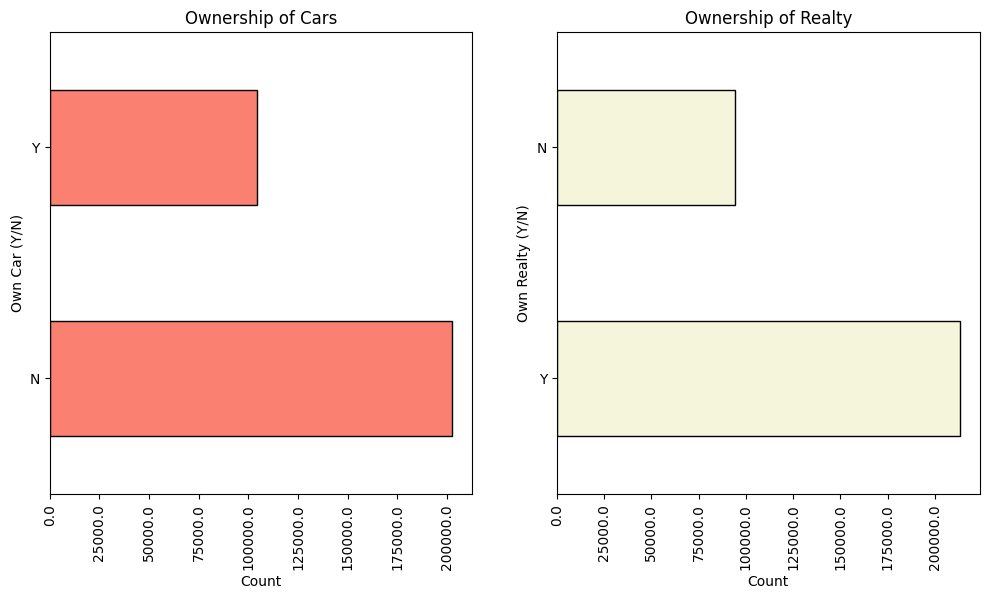

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

df["FLAG_OWN_CAR"].value_counts().plot.barh(ax=axes[0], color='salmon', edgecolor="black")
axes[0].set_title('Ownership of Cars')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Own Car (Y/N)')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation=90)

df["FLAG_OWN_REALTY"].value_counts().plot.barh(ax=axes[1], color='beige', edgecolor="black")
axes[1].set_title('Ownership of Realty')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Own Realty (Y/N)')
axes[1].set_xticklabels(axes[1].get_xticks(), rotation=90)

plt.show()

Majority of people own real estate. However, Most of the people do not own a car.

In [50]:
df.CNT_CHILDREN.value_counts(normalize=True)

CNT_CHILDREN
0     0.700417
1     0.198719
2     0.086984
3     0.012079
4     0.001390
5     0.000273
6     0.000068
7     0.000023
14    0.000010
8     0.000007
9     0.000007
12    0.000007
10    0.000007
19    0.000007
11    0.000003
Name: proportion, dtype: float64

In [51]:
df.CNT_CHILDREN.describe()

count    307217.000000
mean          0.416972
std           0.722044
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

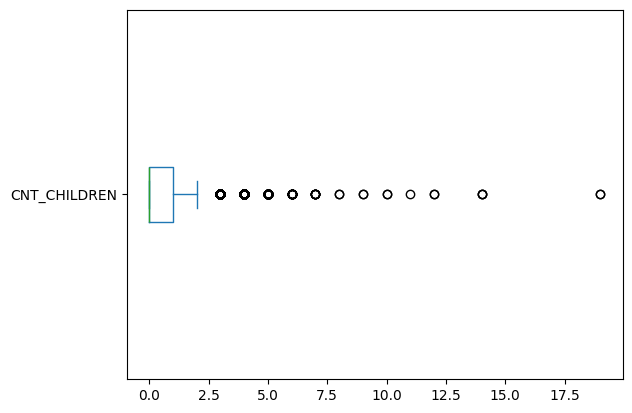

In [52]:
df['CNT_CHILDREN'].plot(kind='box', vert=False)
plt.show()

CNT_CHILDREN columns contains outliers, 
outliers generally lie outside 1.5 times the interquartile range (IQR) from the lower and upper quartiles.
The Outliers shall be removed

In [53]:
df = df[df['CNT_CHILDREN'] < 3]

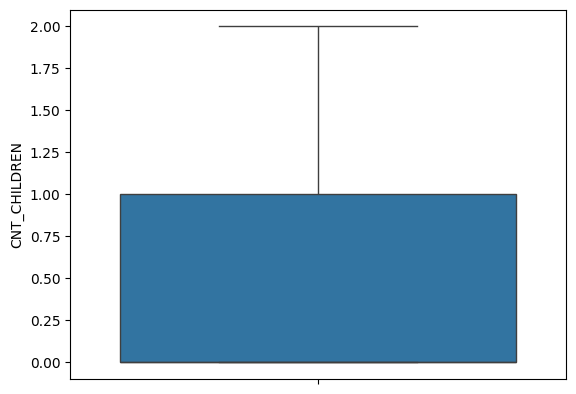

In [54]:
sns.boxplot(df.CNT_CHILDREN)
plt.show()

In [55]:
df.AMT_INCOME_TOTAL.sort_values(ascending=False)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
             ...     
240137        26100.0
186643        26100.0
246104        26100.0
1678          25650.0
20727         25650.0
Name: AMT_INCOME_TOTAL, Length: 302953, dtype: float64

In [56]:
df.AMT_INCOME_TOTAL.describe()

count    3.029530e+05
mean     1.687678e+05
std      2.385100e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

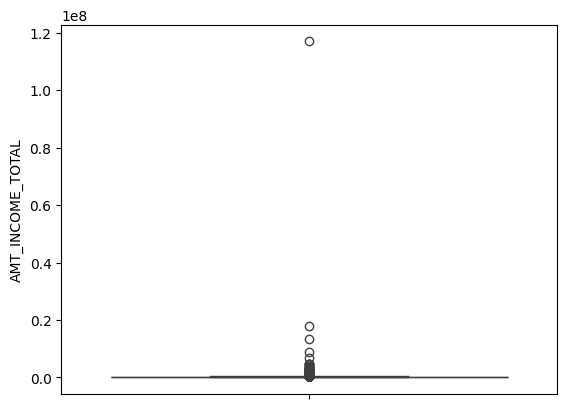

In [57]:
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

Removing outliers, using Inter Quartile Range upper bound is calculated to be 337500. any values greater than this is a outlier

In [58]:
df =df[df["AMT_INCOME_TOTAL"] <= 337500]

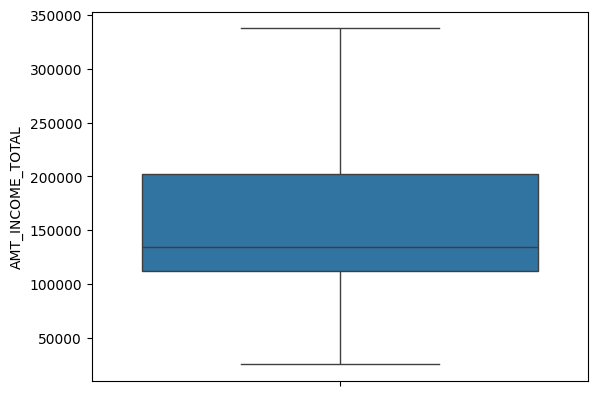

In [59]:
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

I will segregate the AMT_INCOME_TOTAL column into 5 income types namely: Very low, Low, Medium, High, Very High

1. <50,000: Very low,
2. 50000 < x < 100000: low
3. 100000 < x < 200000: Medium
4. 200000 < x < 300000: High>
5. 300000+: Very High 


In [60]:
bins = [-float('inf'), 50000, 100000, 200000, 300000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column for income types based on the defined bins
df['INCOME_TYPE'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=bins, labels=labels)

# Check the result
df[['AMT_INCOME_TOTAL', 'INCOME_TYPE']].head()

,AMT_INCOME_TOTAL,INCOME_TYPE
0,202500.0,High
1,270000.0,High
2,67500.0,Low
3,135000.0,Medium
4,121500.0,Medium


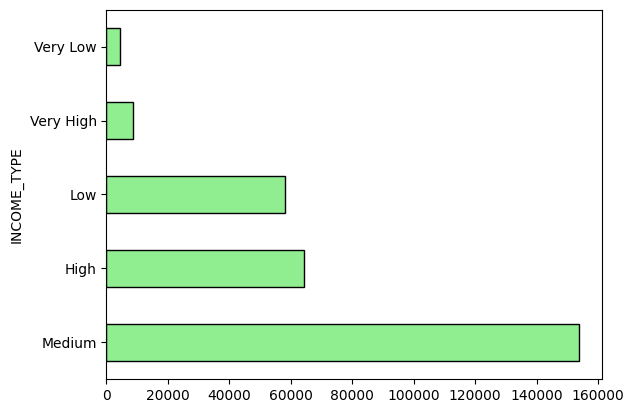

In [61]:
df.INCOME_TYPE.value_counts().plot.barh(color="lightgreen",edgecolor="black")
plt.show()

We can observe that most people fall in the medium income category i.e: between 200000 and 100000

Now I will analyse income,education, family and housing columns present in the dataset

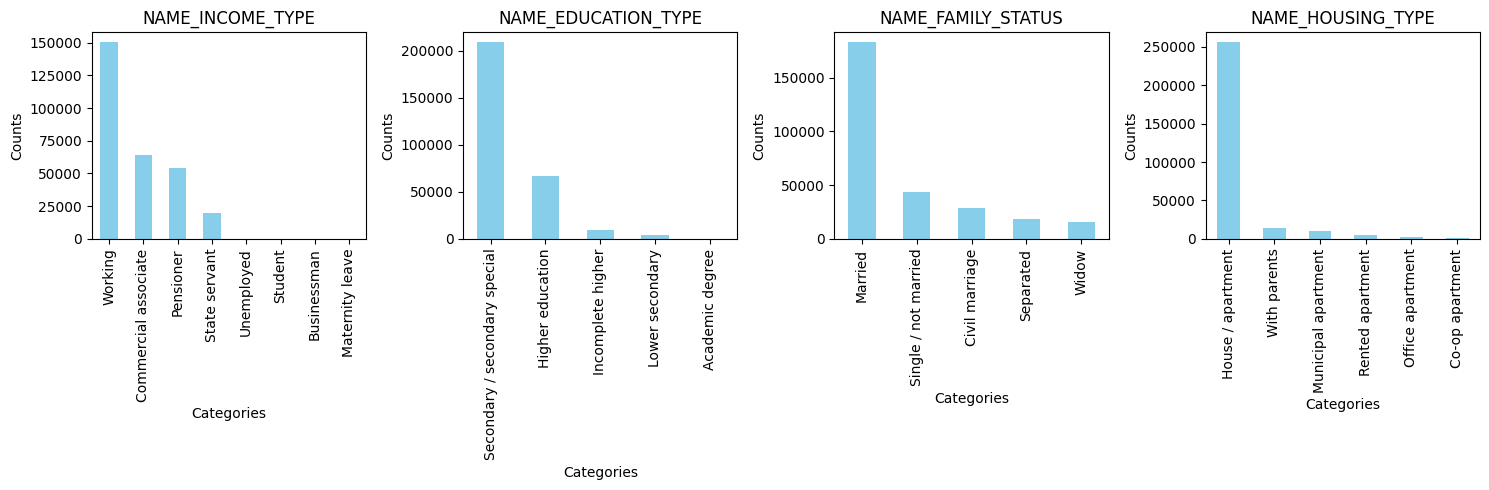

In [62]:
columns_to_plot = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

# Set up the figure and axes for subplots
n = len(columns_to_plot)
fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(15, 5))

# Plot value counts for each column in a separate subplot
for i, column in enumerate(columns_to_plot):
    df[column].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(column)
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Counts')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [63]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'INCOME_TYPE'],
      dtype='object')

In [64]:
df[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].describe()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,2.891910e+05,289191.000000,2.891910e+05
mean,5.799907e+05,26257.590610,5.200895e+05
std,3.846369e+05,13421.640048,3.515099e+05
min,4.500000e+04,1615.500000,4.050000e+04
25%,2.700000e+05,16236.000000,2.340000e+05
50%,5.002110e+05,24394.500000,4.500000e+05
75%,7.908300e+05,33354.000000,6.750000e+05
max,3.860019e+06,225000.000000,3.555000e+06


<Axes: >

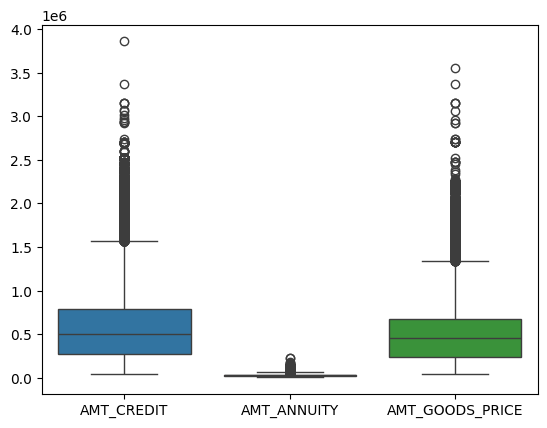

In [65]:
sns.boxplot(df[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']])

Removing Outliers from each variable,
1. AMT_CREDIT:Upper bound = Q3 + 1.5IQR = 7.908300e+05 + 1.55.208300e+05 = 1.221945e+06
2. AMT_ANNUITY: Upper bound = Q3 + 1.5IQR = 33354.000000 + 1.517118.000000 = 53391.000000
3. AMT_GOODS_PRICE: Upper bound = Q3 + 1.5IQR = 6.750000e+05 + 1.54.410000e+05 = 1.102500e+06

These upper bounds can be used to identify and remove outliers from each columns


In [66]:
df = df[(df["AMT_CREDIT"] < 1.22195e+06) & (df["AMT_ANNUITY"] < 53391) & (df["AMT_GOODS_PRICE"] < 1.102500e+06)]

In [67]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,INCOME_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,House / apartment,-637,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0.0,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,House / apartment,-225,1.0,2,2,Government,0.555912,0.729567,0.0,Low


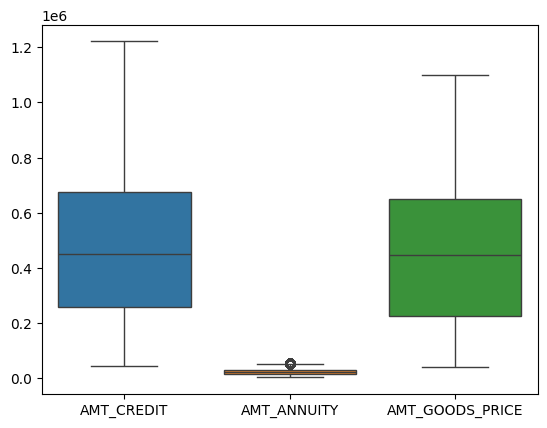

In [68]:
sns.boxplot(df[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']])
plt.show()

Outliers have been succesfully removed

In [69]:
df[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].describe()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,2.567560e+05,256756.000000,2.567560e+05
mean,4.867998e+05,23372.943250,4.326613e+05
std,2.728219e+05,10324.267445,2.411499e+05
min,4.500000e+04,1615.500000,4.050000e+04
25%,2.587095e+05,15264.000000,2.250000e+05
50%,4.500000e+05,22500.000000,4.455000e+05
75%,6.750000e+05,29979.000000,6.480000e+05
max,1.221354e+06,53383.500000,1.098000e+06


In [70]:
df.shape

(256756, 24)

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_QRT'>

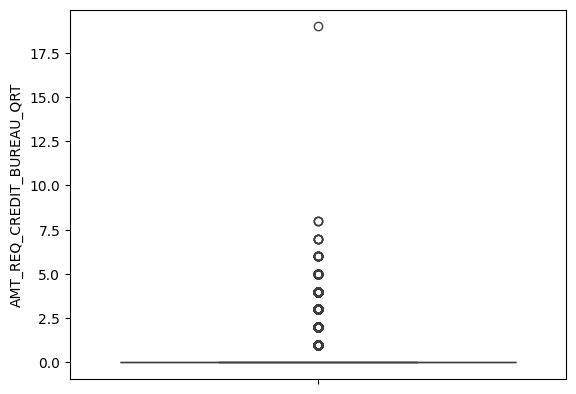

In [71]:
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_QRT'])

In [72]:
df["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts(normalize=True)

AMT_REQ_CREDIT_BUREAU_QRT
0.0     0.838520
1.0     0.107351
2.0     0.046710
3.0     0.005507
4.0     0.001573
5.0     0.000222
6.0     0.000082
7.0     0.000019
8.0     0.000012
19.0    0.000004
Name: proportion, dtype: float64

In [73]:
df["AMT_REQ_CREDIT_BUREAU_QRT"].describe()

count    256756.000000
mean          0.225490
std           0.574185
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          19.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [74]:
df=df[df["AMT_REQ_CREDIT_BUREAU_QRT"] < 4]

In [75]:
df.shape

(256265, 24)

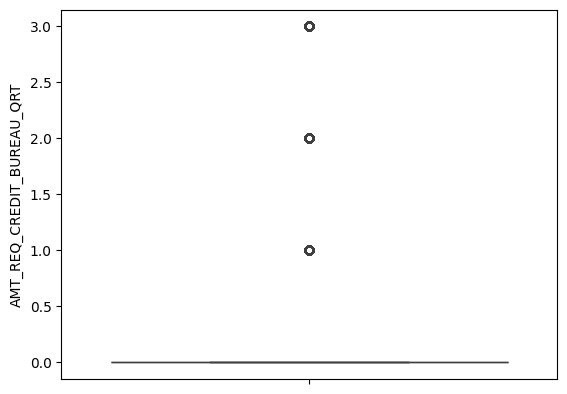

In [76]:
sns.boxplot(df['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

Now that univariate analysis of most of the columns and outlier removal is done. I will now divide the dataframe into two dataframes according to their target value

In [77]:
df_target_1 = df[df["TARGET"]==1]  #For Loan Defaulters

In [78]:
df_target_0 = df[df["TARGET"]==0] #For Non-Loan Defaulters

In [79]:
df_target_1.shape

(21638, 24)

In [80]:
df_target_0.shape

(234627, 24)

We will begin Univariate analysis of variables according to the Default Status

In [81]:
df_target_1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'INCOME_TYPE'],
      dtype='object')

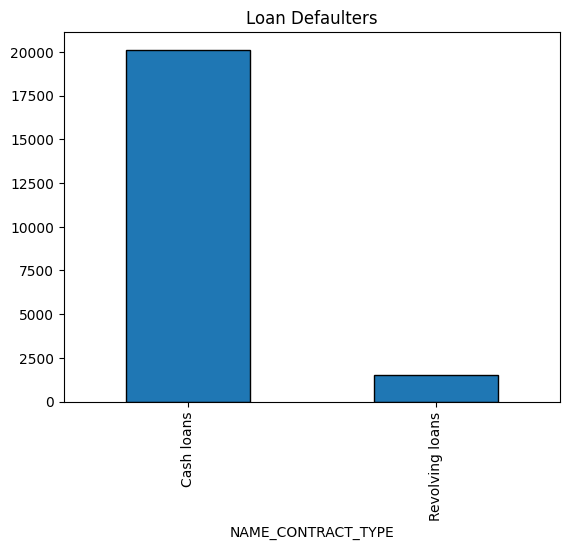

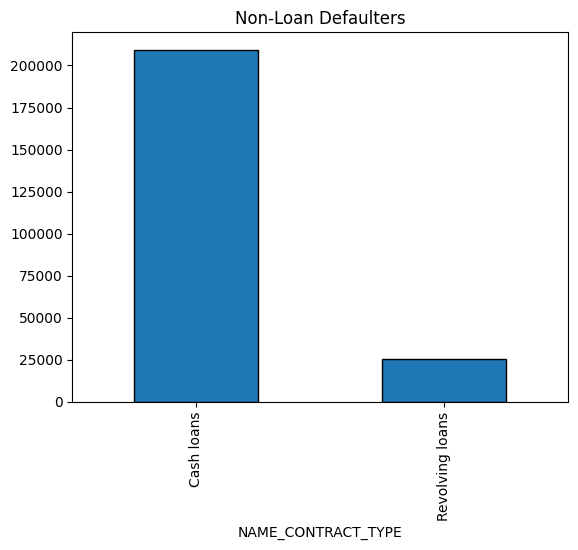

In [82]:
df_target_1.NAME_CONTRACT_TYPE.value_counts().plot.bar(edgecolor="black")
plt.title("Loan Defaulters")
plt.show()
df_target_0.NAME_CONTRACT_TYPE.value_counts().plot.bar(edgecolor="black")
plt.title("Non-Loan Defaulters")
plt.show()

For both the cases, Revolving loans are much less in number when compared to Cash loans.

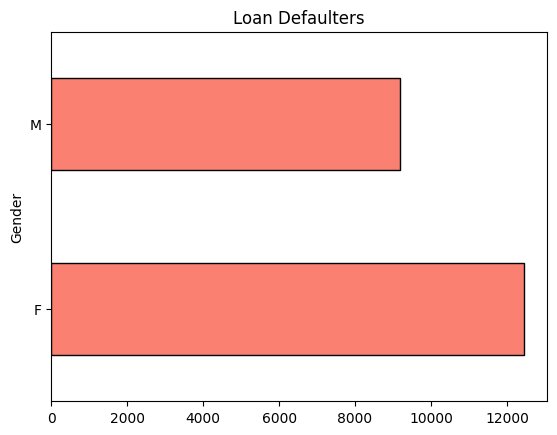

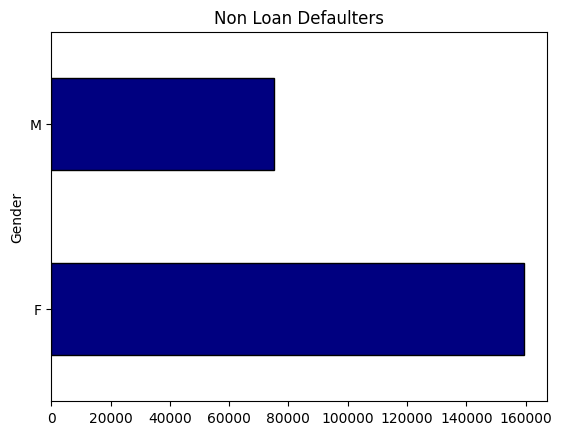

In [83]:
df_target_1.CODE_GENDER.value_counts().plot.barh(color="salmon",edgecolor="black")
plt.title("Loan Defaulters")
plt.ylabel("Gender")
plt.show()
df_target_0.CODE_GENDER.value_counts().plot.barh(color="navy",edgecolor="black")
plt.title("Non Loan Defaulters")
plt.ylabel("Gender")
plt.show()

1. For Loan Default: More female loan defaulters than males
2. For Non-Loan Default: The trend is similar,but much more females in non loan defaulters than males

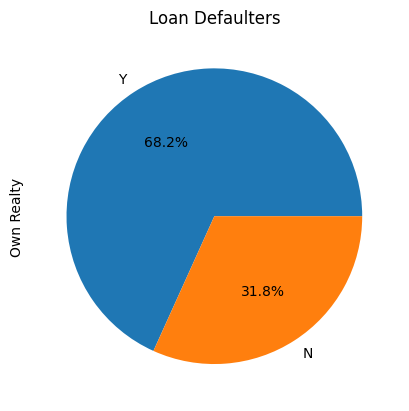

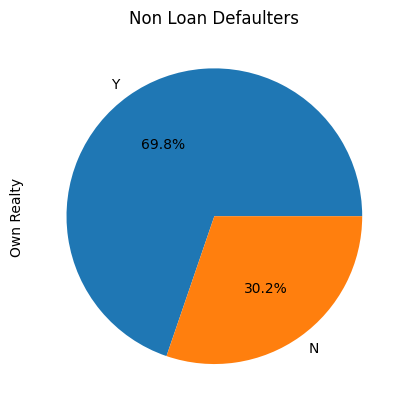

In [84]:
df_target_1.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title("Loan Defaulters")
plt.ylabel("Own Realty")
plt.show()
df_target_0.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title("Non Loan Defaulters")
plt.ylabel("Own Realty")
plt.show()

Very Similar Trends here as well for both categories on basis of whether they own realty or not

In [85]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'INCOME_TYPE'],
      dtype='object')

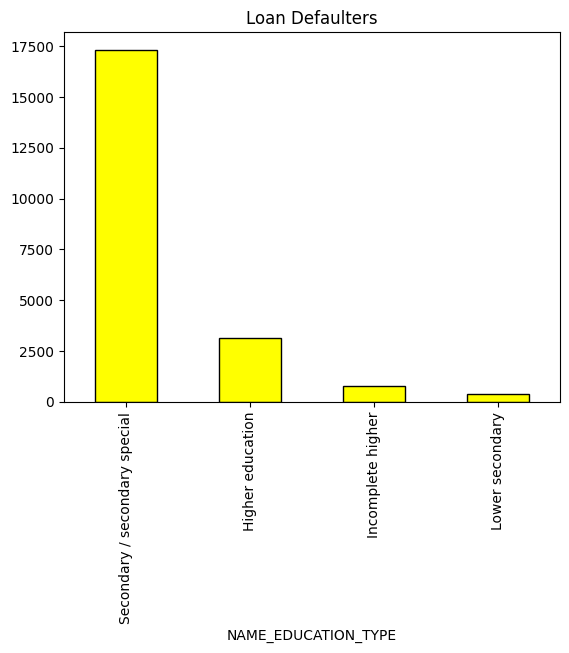

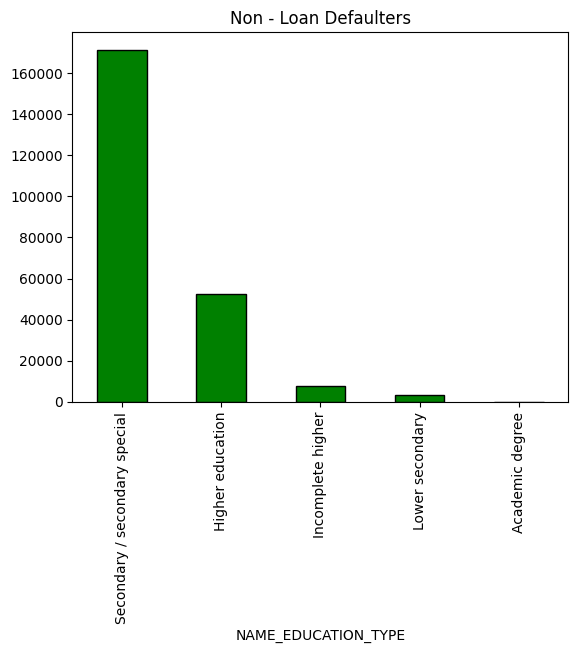

In [86]:
df_target_1.NAME_EDUCATION_TYPE.value_counts().plot.bar(color="yellow",edgecolor="black")
plt.title("Loan Defaulters")
plt.show()
df_target_0.NAME_EDUCATION_TYPE.value_counts().plot.bar(color="green",edgecolor="black")
plt.title("Non - Loan Defaulters")
plt.show()

After analyzing on basis of education type, no trends are observed in either category. Secondary/secondary special are highest number of loan defaulters and non loan defaulters as well

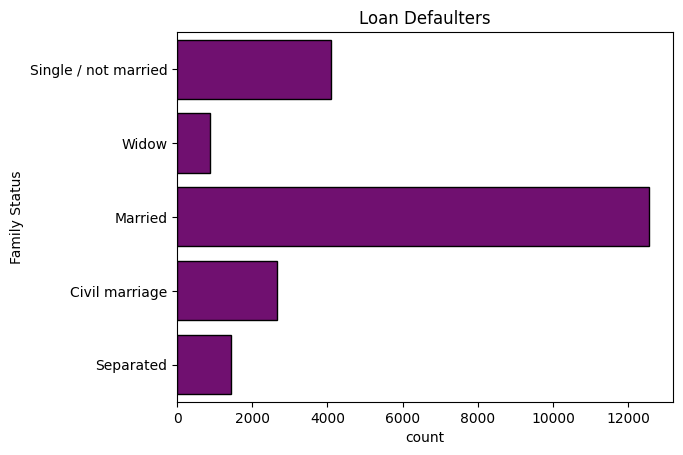

In [87]:
sns.countplot(df_target_1['NAME_FAMILY_STATUS'],color="purple",edgecolor="black")
plt.ylabel("Family Status")
plt.title("Loan Defaulters")
plt.show()

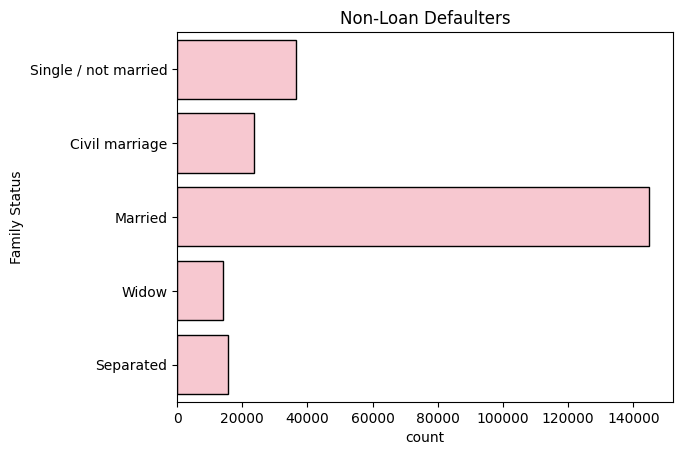

In [88]:
sns.countplot(df_target_0['NAME_FAMILY_STATUS'],color="pink",edgecolor="black")
plt.ylabel("Family Status")
plt.title("Non-Loan Defaulters")
plt.show()

For both categories, Married People are the highest in number i.e for loan default and non loan default

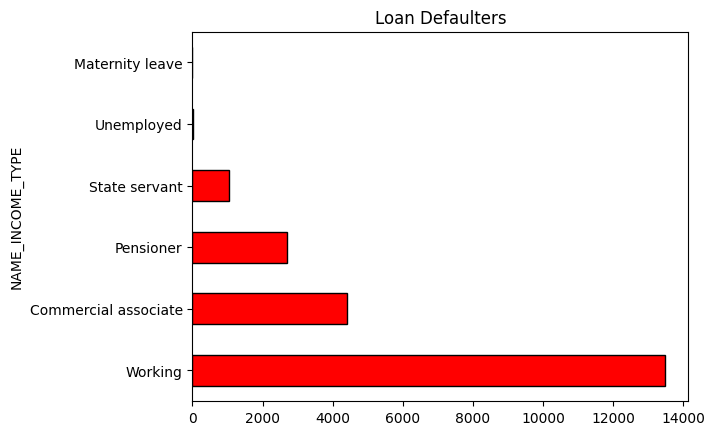

In [89]:
df_target_1.NAME_INCOME_TYPE.value_counts().plot.barh(color="red",edgecolor="black")
plt.title("Loan Defaulters")
plt.show()

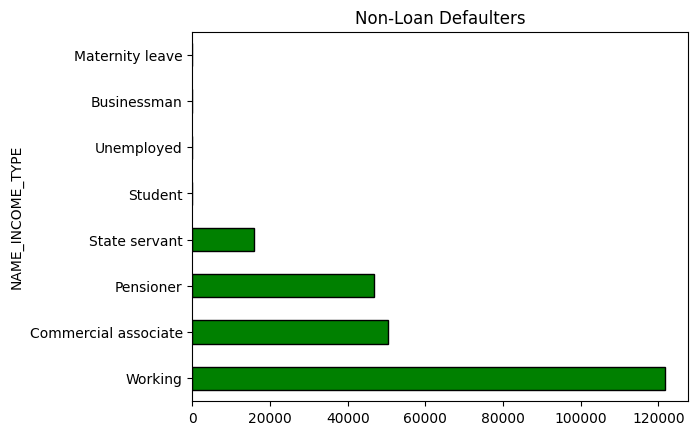

In [90]:
df_target_0.NAME_INCOME_TYPE.value_counts().plot.barh(color="green", edgecolor="black")
plt.title("Non-Loan Defaulters")
plt.show()

Analysis: Again no unique trend is identified. Working people amount for the highest loan defaulters and Non loan defaulters as well

In [91]:
df1["DAYS_BIRTH"]

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [92]:
def age(x):
    return round(abs(x) / 365,0)

In [93]:
df["AGE"] = df1["DAYS_BIRTH"]

In [94]:
df["AGE"] = df["AGE"].apply(age)

In [95]:
df.AGE.describe()

count    256265.000000
mean         43.955897
std          12.257728
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

Segmenting the age column into 3 types, Young i.e <35 , Middle Aged 35-50, Senior > 50

In [298]:
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 50, np.inf], labels=['Young', 'Middle Aged', 'Senior'])

In [97]:
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,INCOME_TYPE,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0.0,High,26.0,Young
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1.0,2,2,Government,0.555912,0.729567,0.0,Low,52.0,Senior
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,2,2,Business Entity Type 3,0.650442,0.535276,0.0,Medium,52.0,Senior


In [98]:
df_target_1 = df[df["TARGET"]==1]
df_target_0 = df[df["TARGET"]==0]

In [105]:
df_target_1.AGE_GROUP.value_counts()


AGE_GROUP
Middle Aged    13075
Senior          4957
Young           3606
Name: count, dtype: int64

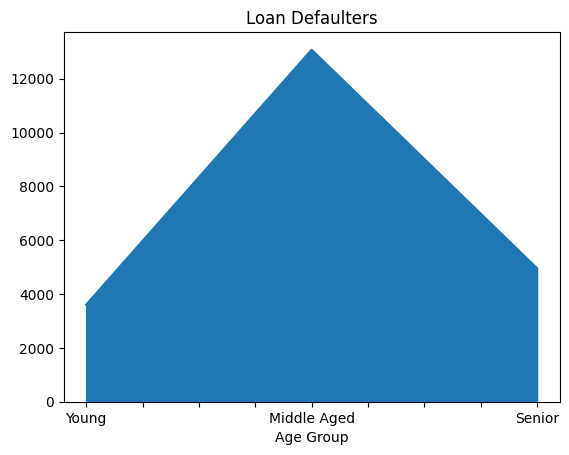

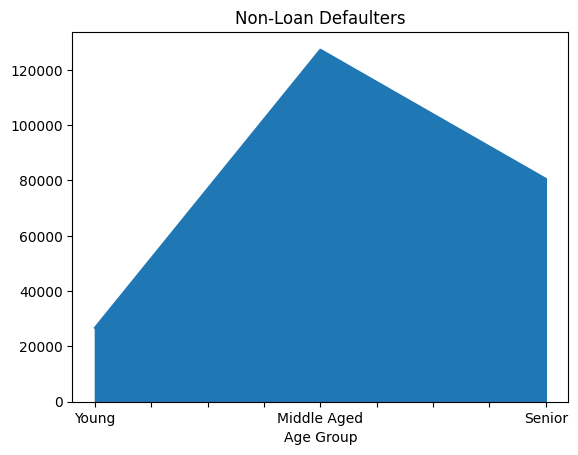

In [114]:
df_target_1.AGE_GROUP.value_counts().sort_index().plot.area()
plt.xlabel("Age Group")
plt.title("Loan Defaulters")
plt.show()
df_target_0.AGE_GROUP.value_counts().sort_index().plot.area()
plt.xlabel("Age Group")
plt.title("Non-Loan Defaulters")
plt.show()


Analysis: Middle Aged (28-50) amount for the highest number of for both loan and non loan defaulters

In [117]:
df.AGE.describe()

count    256265.000000
mean         43.955897
std          12.257728
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

In [120]:
df_target_1.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'INCOME_TYPE', 'AGE',
       'AGE_GROUP'],
      dtype='object')

In [125]:
df.ORGANIZATION_TYPE

0         Business Entity Type 3
2                     Government
3         Business Entity Type 3
4                       Religion
5                          Other
                   ...          
307506                  Services
307507                       XNA
307508                    School
307509    Business Entity Type 1
307510    Business Entity Type 3
Name: ORGANIZATION_TYPE, Length: 256265, dtype: object

In [127]:
df = df[-(df.ORGANIZATION_TYPE == "XNA")]

In [128]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,INCOME_TYPE,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0.0,High,26.0,Young
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1.0,2,2,Government,0.555912,0.729567,0.0,Low,52.0,Senior


In [129]:
df_target_1 = df[df["TARGET"] == 1]

In [130]:
df_target_0 = df[df["TARGET"] == 0]

In [131]:
df_target_0.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,INCOME_TYPE,AGE,AGE_GROUP
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1.0,2,2,Government,0.555912,0.729567,0.0,Low,52.0,Senior
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,2,2,Business Entity Type 3,0.650442,0.535276,0.0,Medium,52.0,Senior


In [134]:
df_target_1.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'Self-employed', 'Trade: type 2',
       'Trade: type 3', 'Insurance', 'Industry: type 3', 'Other',
       'Industry: type 9', 'Security', 'Medicine', 'School',
       'Transport: type 2', 'Government', 'Transport: type 4',
       'Industry: type 1', 'Electricity', 'Business Entity Type 1',
       'Trade: type 7', 'Legal Services', 'Housing', 'Industry: type 12',
       'Security Ministries', 'Kindergarten', 'Services',
       'Industry: type 11', 'Industry: type 13', 'Business Entity Type 2',
       'Industry: type 7', 'Postal', 'Agriculture', 'Police', 'Bank',
       'Military', 'Trade: type 6', 'Transport: type 3', 'Restaurant',
       'University', 'Construction', 'Trade: type 1', 'Telecom',
       'Emergency', 'Cleaning', 'Industry: type 6', 'Industry: type 2',
       'Industry: type 4', 'Advertising', 'Hotel', 'Mobile',
       'Industry: type 5', 'Trade: type 5', 'Realtor', 'Religion',
       'Transport: type 1', 'Industry: type 10', 'Culture',
  

There are many subtypes in organization type e.g Trade: Type, Business Entity Type, Industry Type, Transport type.Moreover, Since more information is not known about the subtypes, I will group all such types in their respective overall type to ease the analysis

In [136]:
#Mapping Dictionary
type_mapping = {
    'Business Entity Type 1': 'Business Entity',
    'Business Entity Type 2': 'Business Entity',
    'Business Entity Type 3': 'Business Entity',
    'Self-employed': 'Self-employed',
    'Trade: type 1': 'Trade',
    'Trade: type 2': 'Trade',
    'Trade: type 3': 'Trade',
    'Trade: type 4': 'Trade',
    'Trade: type 5': 'Trade',
    'Trade: type 6': 'Trade',
    'Trade: type 7': 'Trade',
    'Insurance': 'Insurance',
    'Industry: type 1': 'Industry',
    'Industry: type 2': 'Industry',
    'Industry: type 3': 'Industry',
    'Industry: type 4': 'Industry',
    'Industry: type 5': 'Industry',
    'Industry: type 6': 'Industry',
    'Industry: type 7': 'Industry',
    'Industry: type 8': 'Industry',
    'Industry: type 9': 'Industry',
    'Industry: type 10': 'Industry',
    'Industry: type 11': 'Industry',
    'Industry: type 12': 'Industry',
    'Industry: type 13': 'Industry',
    'Other': 'Other',
    'Security': 'Security',
    'Medicine': 'Medicine',
    'School': 'Education',
    'University': 'Education',
    'Kindergarten': 'Education',
    'Transport: type 1': 'Transport',
    'Transport: type 2': 'Transport',
    'Transport: type 3': 'Transport',
    'Transport: type 4': 'Transport',
    'Government': 'Government',
    'Electricity': 'Electricity',
    'Legal Services': 'Legal Services',
    'Housing': 'Housing',
    'Security Ministries': 'Security',
    'Services': 'Services',
    'Postal': 'Postal',
    'Agriculture': 'Agriculture',
    'Police': 'Police',
    'Bank': 'Bank',
    'Military': 'Military',
    'Restaurant': 'Restaurant',
    'Construction': 'Construction',
    'Telecom': 'Telecom',
    'Emergency': 'Emergency',
    'Cleaning': 'Cleaning',
    'Advertising': 'Advertising',
    'Hotel': 'Hotel',
    'Mobile': 'Mobile',
    'Realtor': 'Realtor',
    'Religion': 'Religion',
    'Culture': 'Culture'
}

In [137]:
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].map(type_mapping)

In [138]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,INCOME_TYPE,AGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,2,2,Business Entity,0.262949,0.139376,0.0,High,26.0,Young
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1.0,2,2,Government,0.555912,0.729567,0.0,Low,52.0,Senior


In [140]:
df_target_1= df[df["TARGET"]==1]

In [141]:
df_target_0= df[df["TARGET"]==0]

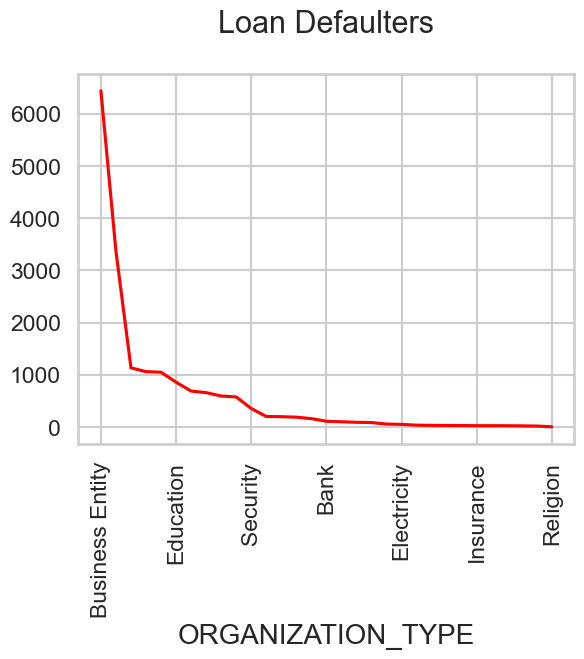

In [479]:
df_target_1.ORGANIZATION_TYPE.value_counts().plot.line(color="red")
plt.xticks(rotation=90)
plt.title("Loan Defaulters")
plt.show()

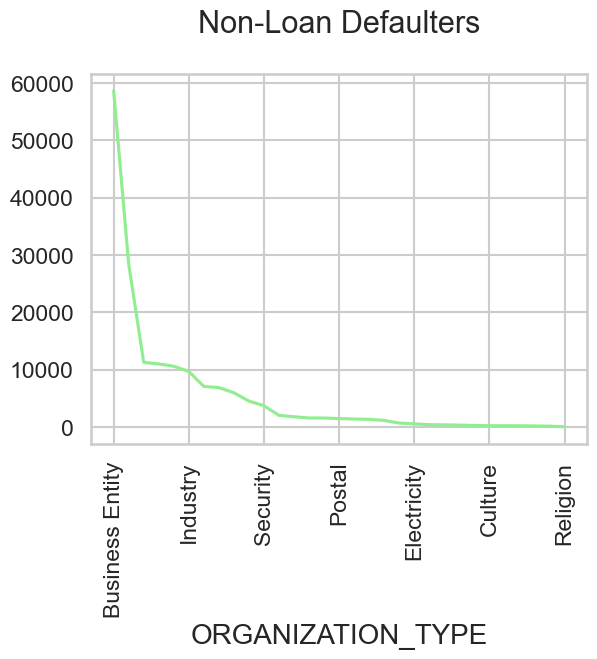

In [480]:
df_target_0.ORGANIZATION_TYPE.value_counts().plot.line(color="lightgreen")
plt.xticks(rotation=90)
plt.title("Non-Loan Defaulters")
plt.show()

Analysis: Although, Business Entity type amounts to the highest counts of loan defaulters and non loan defaulters. An interesting observation is made, Education is 2nd Highest in loan default whereas Trade is 2nd highest non loan default and trade organization type is not present in top 5 categories of Loan Default. This puts Trade organization type st a safe position to be offered a loan.

EXT_SOURCE_2 and EXT_SOURCE_3 i.e normalized score from external data source are columns of interest too. They shall be further analysed

In [159]:
df[["EXT_SOURCE_2","EXT_SOURCE_3"]].describe()

,EXT_SOURCE_2,EXT_SOURCE_3
count,2.068270e+05,206827.000000
mean,5.057916e-01,0.505017
std,1.912865e-01,0.176512
min,8.173617e-08,0.000527
25%,3.821393e-01,0.399676
50%,5.549077e-01,0.535276
75%,6.557774e-01,0.622922
max,8.549997e-01,0.893976


<Axes: ylabel='EXT_SOURCE_2'>

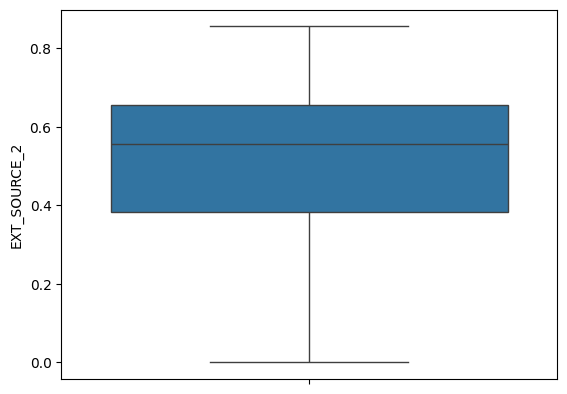

In [166]:
sns.boxplot(df["EXT_SOURCE_2"])

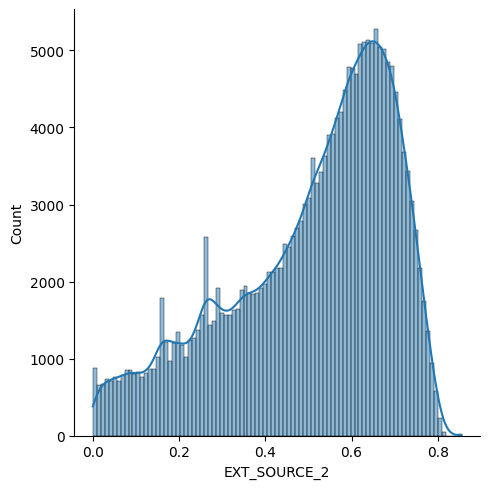

In [176]:
sns.displot(df["EXT_SOURCE_2"], kde=True)

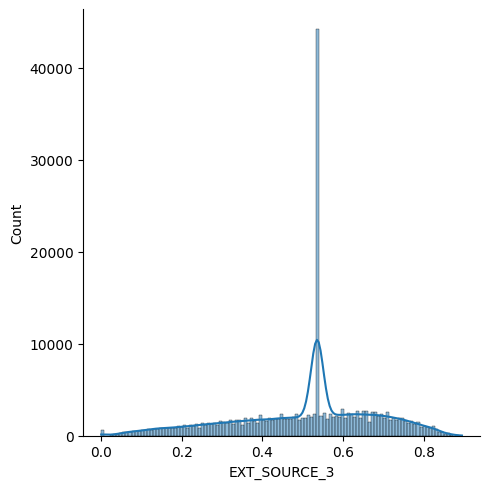

In [175]:
sns.displot(df["EXT_SOURCE_3"], kde=True)

A higher normalized score is generally a good indication of loan being granted, I will now calculate the average scores for both loan defaulters and non loan defaulters.

In [184]:
df_target_1[["EXT_SOURCE_2","EXT_SOURCE_3"]].mean()

EXT_SOURCE_2    0.402777
EXT_SOURCE_3    0.416735
dtype: float64

In [182]:
df_target_0[["EXT_SOURCE_2","EXT_SOURCE_3"]].mean()

EXT_SOURCE_2    0.516173
EXT_SOURCE_3    0.513914
dtype: float64

Analysis: For non loan defaulters the average EXT_SOURCE_2 and EXT_SOURCE_3 scores are higher than loan defaulters
1. EXT_SOURCE_2 is 28.15% higher
2. EXT_SOURCE_3 is 23.32% higher

In [189]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'INCOME_TYPE', 'AGE',
       'AGE_GROUP'],
      dtype='object')

1. AMT_CREDIT - Credit amount of the loan
2. AMT_ANNUITY - Loan annuity
3. AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

In [192]:
df["AMT_CREDIT"].describe()

count    2.068270e+05
mean     4.942698e+05
std      2.743316e+05
min      4.500000e+04
25%      2.695500e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.221354e+06
Name: AMT_CREDIT, dtype: float64

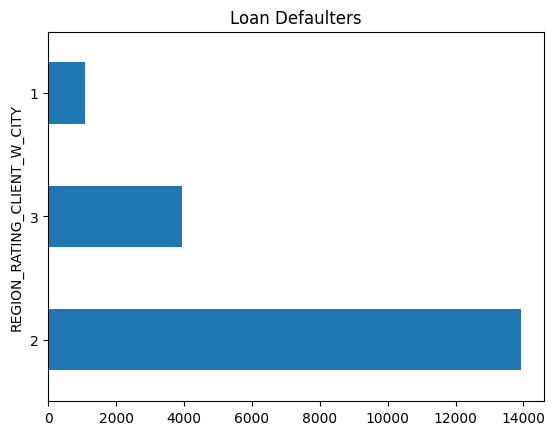

In [214]:
df_target_1["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.barh()
plt.title("Loan Defaulters")
plt.show()

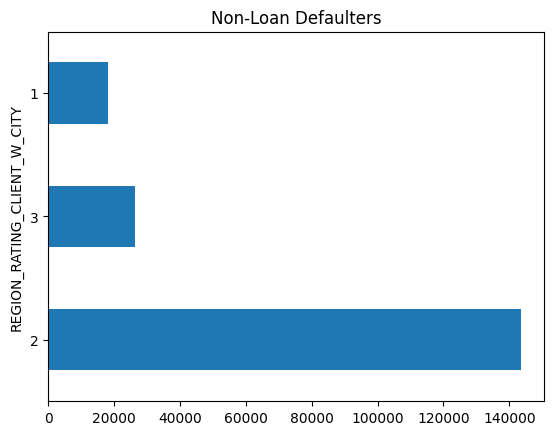

In [215]:
df_target_0["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.barh()
plt.title("Non-Loan Defaulters")
plt.show()

In [233]:
df.DAYS_EMPLOYED

0          1
2          0
3          8
4          8
5          4
          ..
307504    19
307506     0
307508    21
307509    13
307510     3
Name: DAYS_EMPLOYED, Length: 206827, dtype: int64

In [234]:
df.DAYS_EMPLOYED_YEARS = df.DAYS_EMPLOYED.apply(lambda x: abs(x))

BIVARIATE ANALYSIS

In [216]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'INCOME_TYPE', 'AGE',
       'AGE_GROUP'],
      dtype='object')

Selection of appropriate columns for correlation analysis

In [245]:
corr_col = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_2','EXT_SOURCE_3','REGION_RATING_CLIENT']

In [247]:
df_corr_target_1 = df_target_1[corr_col]

In [248]:
res = df_corr_target_1.corr()

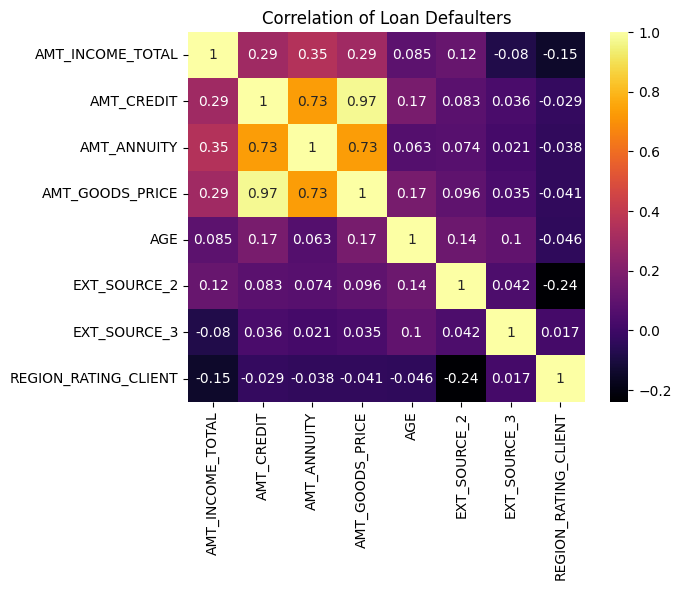

In [263]:
sns.heatmap(res, cmap = "inferno", annot=True)
plt.title("Correlation of Loan Defaulters")
plt.show()

High Correlation:

1. AMT_CREDIT and AMT_GOODS_PRICE have a high positive correlation (0.97). This suggests that the credit amount tends to increase with the goods price.
2. AMT_CREDIT and AMT_ANNUITY also show a strong correlation (0.73), indicating that larger credit amounts are associated with higher annuities.
3. AMT_GOODS_PRICE and AMT_ANNUITY have a positive correlation (0.73) as well, which is expected since goods price often influences both credit and annuity values.

Weak Correlation:

1. AGE has weak correlations with other variables, with the highest being with AMT_CREDIT (0.17), implying that age doesn’t have a strong influence on loan-related amounts in this dataset.
2. EXT_SOURCE_3 generally shows very low correlations with other variables, suggesting it may represent an independent assessment factor not strongly linked to other financial metrics.

Negative Correlations:
1. REGION_RATING_CLIENT has some weak negative correlations, particularly with EXT_SOURCE_2 (-0.24) and AMT_INCOME_TOTAL (-0.15). This might     imply that lower-rated regions could be linked with slightly lower income and external source values.


In [254]:
df_corr_target_0 = df[corr_col]

In [255]:
res2 = df_corr_target_0.corr()

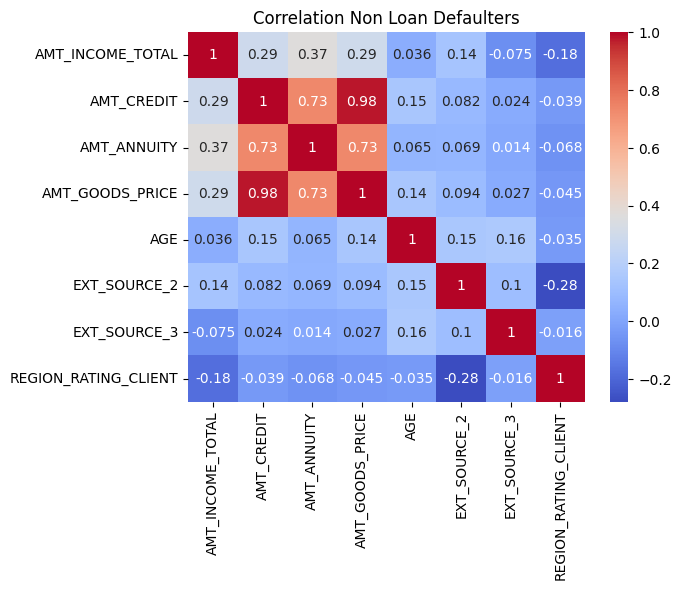

In [260]:
sns.heatmap(res2, annot=True, cmap="coolwarm")
plt.title("Correlation Non Loan Defaulters")
plt.show()

High Correlation:

1. AMT_CREDIT and AMT_GOODS_PRICE still show a very high positive correlation (0.98), similar to loan defaulters. This consistency suggests that credit and goods prices are highly interdependent, regardless of default status.
2. AMT_CREDIT and AMT_ANNUITY also retain a strong positive correlation (0.73), showing that credit amount and annuity are related for non-defaulters as well.

Low Correlation:

1. AGE has very low correlations with most other variables. However, for non-defaulters, AGE shows a slight positive correlation with EXT_SOURCE_3 (0.16), indicating a weak association between age and external score 3.
2. EXT_SOURCE_3 generally has minimal correlation with other variables, similar to the defaulters' case.
Negative Correlations:

3. REGION_RATING_CLIENT has slightly stronger negative correlations with EXT_SOURCE_2 and AMT_INCOME_TOTAL for non-defaulters, suggesting that clients from regions with lower ratings may have lower external scores and income.


<b>Bivariate Analysis of Income group and gender</b>

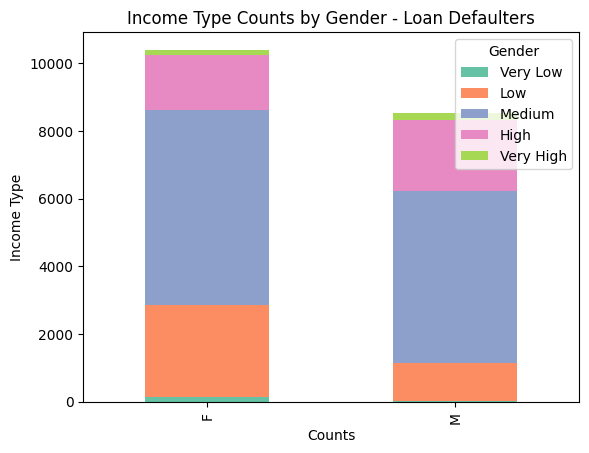

In [299]:
income_counts = df_target_1.groupby(by="CODE_GENDER")["INCOME_TYPE"].value_counts().unstack(fill_value=0)

# Plotting
income_counts.plot.bar(stacked=True, color=plt.get_cmap('Set2').colors)
plt.xlabel('Counts')
plt.ylabel('Income Type')
plt.title('Income Type Counts by Gender - Loan Defaulters')
plt.legend(title='Gender', loc="upper right")
plt.show()

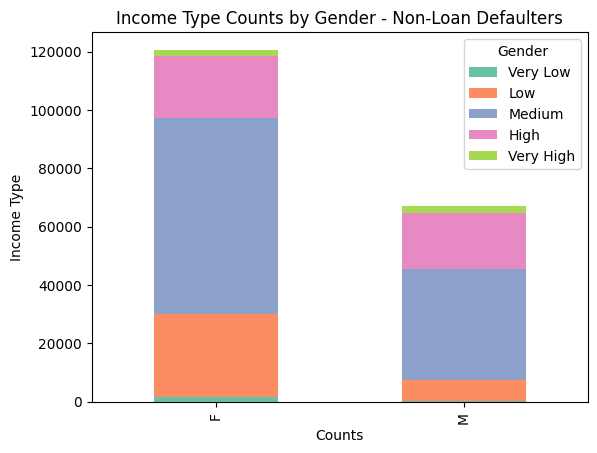

In [301]:
income_counts = df_target_0.groupby(by="CODE_GENDER")["INCOME_TYPE"].value_counts().unstack(fill_value=0)

# Plotting
income_counts.plot.bar(stacked=True, color=plt.get_cmap('Set2').colors)
plt.xlabel('Counts')
plt.ylabel('Income Type')
plt.title('Income Type Counts by Gender - Non-Loan Defaulters')
plt.legend(title='Gender', loc="upper right")
plt.show()

In [310]:
age_gender_count_1 = df_target_1.groupby(by="CODE_GENDER")["AGE_GROUP"].value_counts().unstack(fill_value=0)

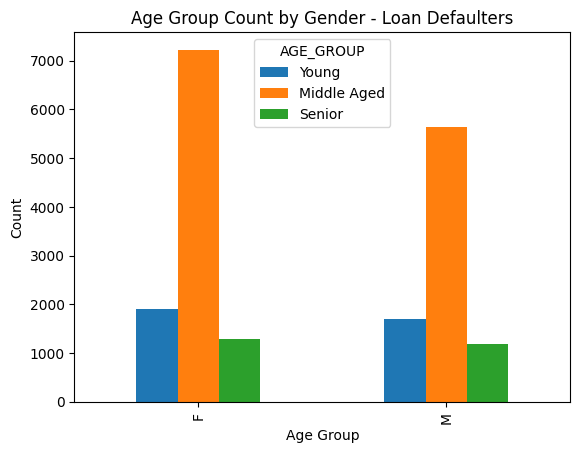

In [312]:
age_gender_count_1.plot.bar()
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.title("Age Group Count by Gender - Loan Defaulters")
plt.show()

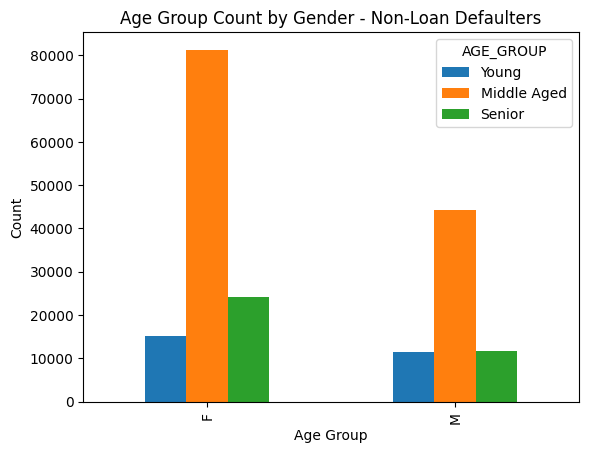

In [316]:
age_gender_count_0 = df_target_0.groupby(by="CODE_GENDER")["AGE_GROUP"].value_counts().unstack(fill_value=0)
age_gender_count_0.plot.bar()
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.title("Age Group Count by Gender - Non-Loan Defaulters")
plt.show()

In [317]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'INCOME_TYPE', 'AGE',
       'AGE_GROUP'],
      dtype='object')

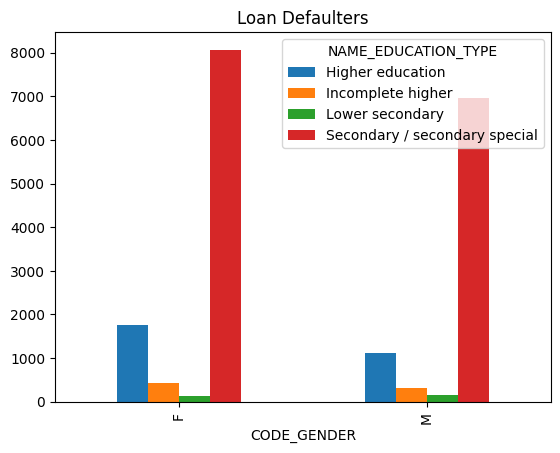

In [334]:
df_target_1.groupby(by="CODE_GENDER")["NAME_EDUCATION_TYPE"].value_counts().unstack(fill_value=0).plot.bar()
plt.title("Loan Defaulters")
plt.show()


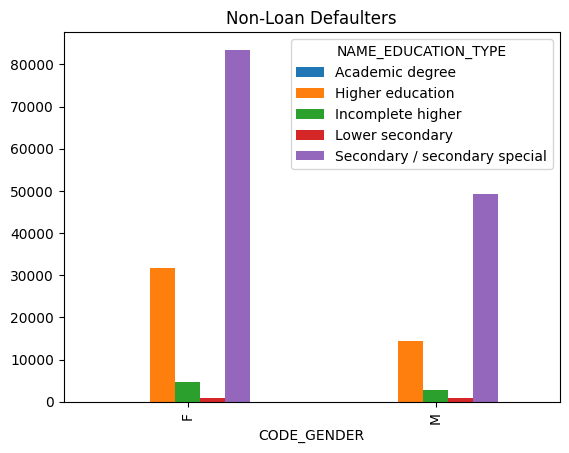

In [333]:
df_target_0.groupby(by="CODE_GENDER")["NAME_EDUCATION_TYPE"].value_counts().unstack(fill_value=0).plot.bar()
plt.title("Non-Loan Defaulters")
plt.show()

In [335]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'INCOME_TYPE', 'AGE',
       'AGE_GROUP'],
      dtype='object')

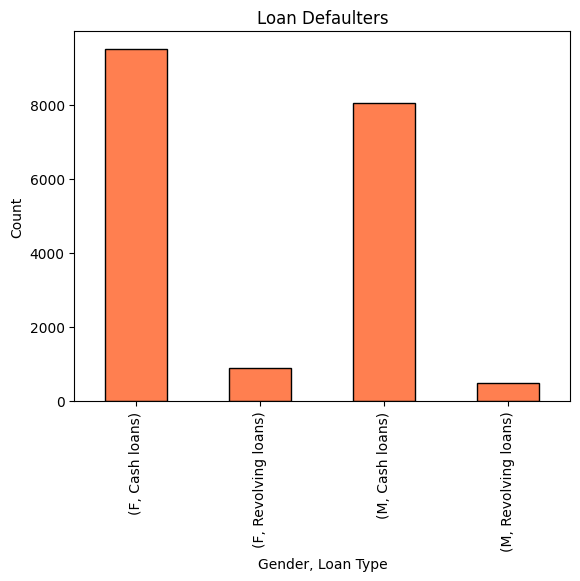

In [348]:
df_target_1.groupby(by="CODE_GENDER")["NAME_CONTRACT_TYPE"].value_counts().plot.bar(edgecolor="black", color="coral")
plt.title("Loan Defaulters")
plt.ylabel("Count")
plt.xlabel("Gender, Loan Type")
plt.show()

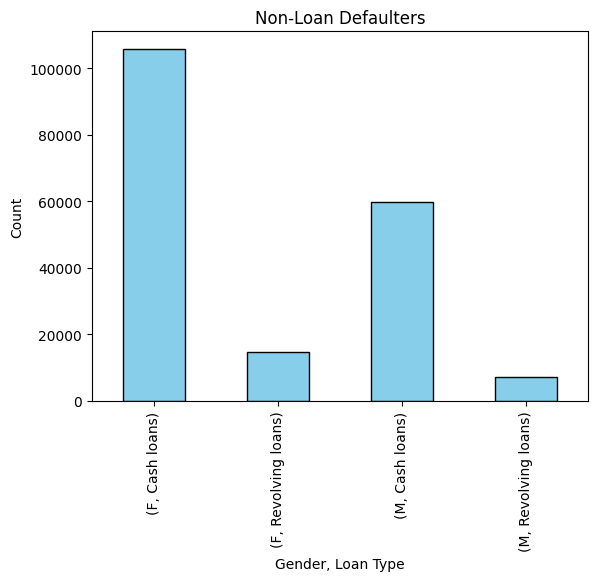

In [352]:
df_target_0.groupby(by="CODE_GENDER")["NAME_CONTRACT_TYPE"].value_counts().plot.bar(edgecolor="black", color="skyblue")
plt.title("Non-Loan Defaulters")
plt.ylabel("Count")
plt.xlabel("Gender, Loan Type")
plt.show()

In [362]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT', 'INCOME_TYPE', 'AGE',
       'AGE_GROUP'],
      dtype='object')

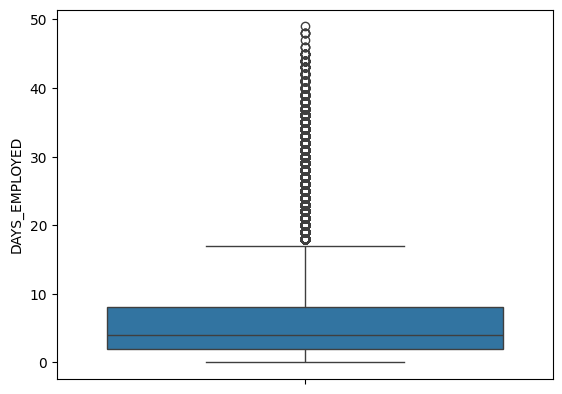

In [366]:
sns.boxplot(df["DAYS_EMPLOYED"])
plt.show()

In [367]:
df.DAYS_EMPLOYED.describe()

count    206827.000000
mean          5.881369
std           6.371219
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max          49.000000
Name: DAYS_EMPLOYED, dtype: float64

upper bound = 17

In [368]:
df = df[df["DAYS_EMPLOYED"] < 17]

In [369]:
df["YEARS_EMPLOYED"] = df["DAYS_EMPLOYED"]

In [370]:
df.drop("DAYS_EMPLOYED", axis=1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,INCOME_TYPE,AGE,AGE_GROUP,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,2,Business Entity,0.262949,0.139376,0.0,High,26.0,Young,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2,2,Government,0.555912,0.729567,0.0,Low,52.0,Senior,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,2,Business Entity,0.650442,0.535276,0.0,Medium,52.0,Senior,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2,2,Religion,0.322738,0.535276,0.0,Medium,55.0,Senior,8
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,2,2,Other,0.354225,0.621226,1.0,Low,46.0,Middle Aged,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307497,456241,0,Cash loans,F,Y,Y,0,180000.0,270126.0,12028.5,...,2,2,Trade,0.651306,0.524496,0.0,Medium,46.0,Middle Aged,3
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,...,2,2,Bank,0.501221,0.609276,0.0,Medium,33.0,Young,1
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,1,1,Services,0.681632,0.535276,0.0,Medium,26.0,Young,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,2,2,Business Entity,0.514163,0.661024,0.0,Medium,33.0,Young,13


In [373]:
df_target_1 = df[df["TARGET"] == 1]
df_target_0 = df[df["TARGET"] == 0]

In [374]:
df_target_1.YEARS_EMPLOYED.mean()

3.7088080631025417

In [375]:
df_target_0.YEARS_EMPLOYED.mean()

4.634274420582118

In [376]:
((4.6342 - 3.7088) / 4.6342) * 100

19.96892667558586

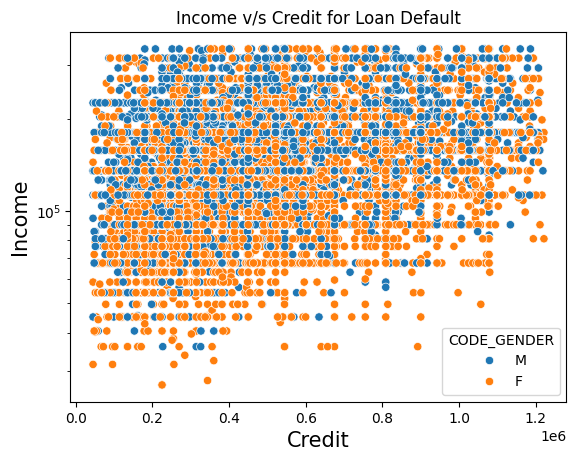

In [390]:
sns.scatterplot(x = df_target_1["AMT_CREDIT"], y = df_target_1['AMT_INCOME_TOTAL'], hue=df_target_1["CODE_GENDER"])
plt.yscale("log")
plt.title("Income v/s Credit for Loan Default")
plt.ylabel("Income", fontsize=15)
plt.xlabel("Credit", fontsize=15)
plt.show()


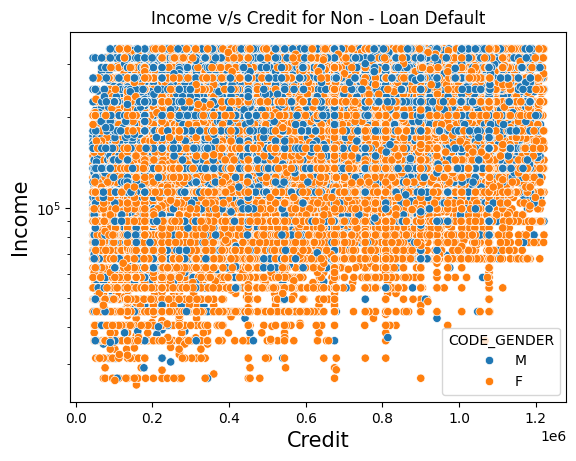

In [391]:
sns.scatterplot(x = df_target_0["AMT_CREDIT"], y = df_target_0['AMT_INCOME_TOTAL'], hue=df_target_0["CODE_GENDER"])
plt.yscale("log")
plt.title("Income v/s Credit for Non - Loan Default")
plt.ylabel("Income", fontsize=15)
plt.xlabel("Credit", fontsize=15)
plt.show()

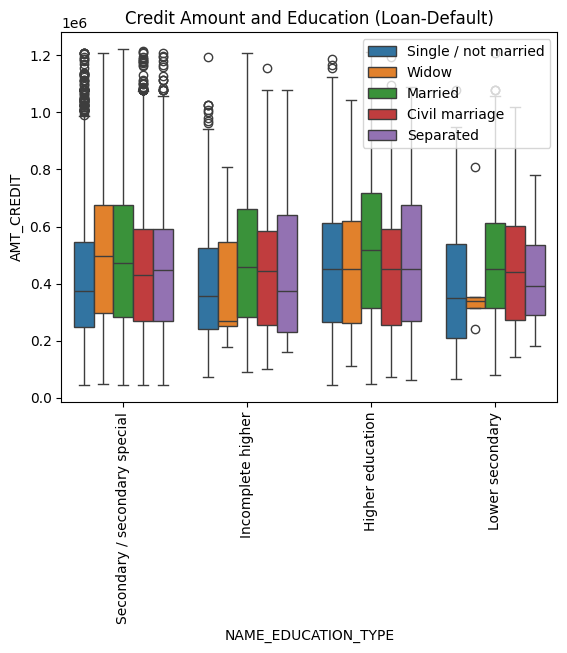

In [413]:
sns.boxplot(data=df_target_1, x = df_target_1.NAME_EDUCATION_TYPE,y =  df_target_1.AMT_CREDIT, hue="NAME_FAMILY_STATUS",orient="v")
plt.xticks(rotation = 90)
plt.title("Credit Amount and Education (Loan-Default)")
plt.legend(loc="upper right")
plt.show()

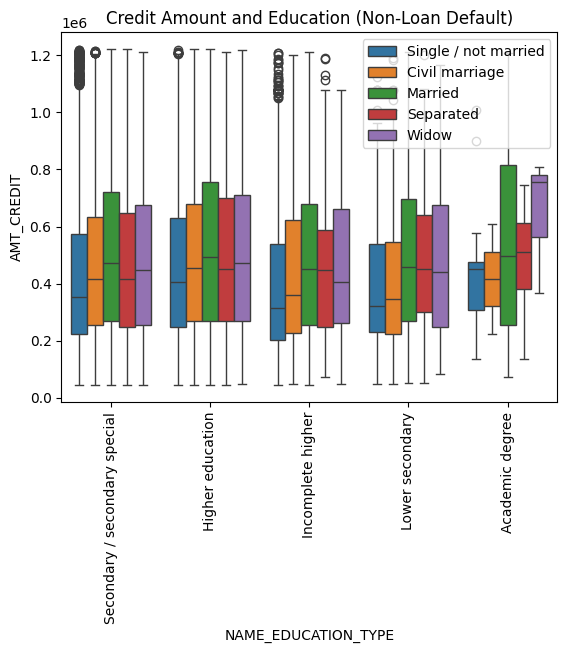

In [417]:
sns.boxplot(data=df_target_0, x = df_target_0.NAME_EDUCATION_TYPE,y =  df_target_0.AMT_CREDIT, hue="NAME_FAMILY_STATUS",orient="v")
plt.xticks(rotation = 90)
plt.title("Credit Amount and Education (Non-Loan Default)")
plt.legend(loc="upper right")
plt.show()

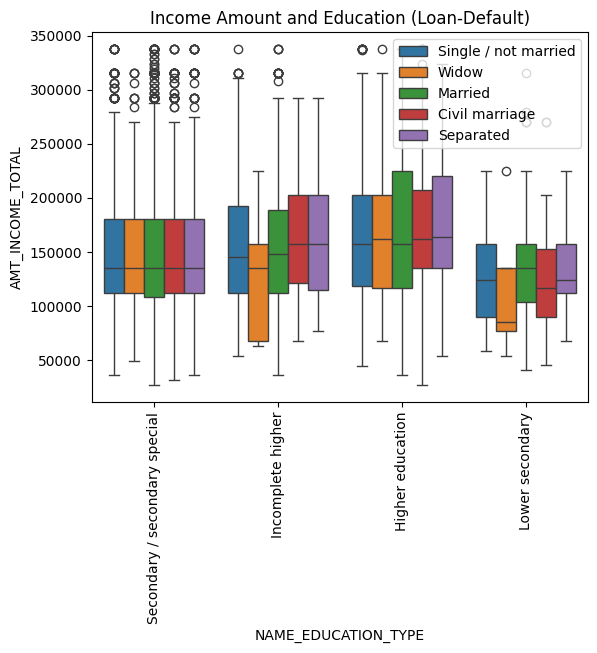

In [424]:
sns.boxplot(data=df_target_1, x = df_target_1.NAME_EDUCATION_TYPE,y =  df_target_1.AMT_INCOME_TOTAL, hue="NAME_FAMILY_STATUS",orient="v")
plt.xticks(rotation = 90)
plt.title("Income Amount and Education (Loan-Default)")
plt.legend(loc="upper right")
plt.show()

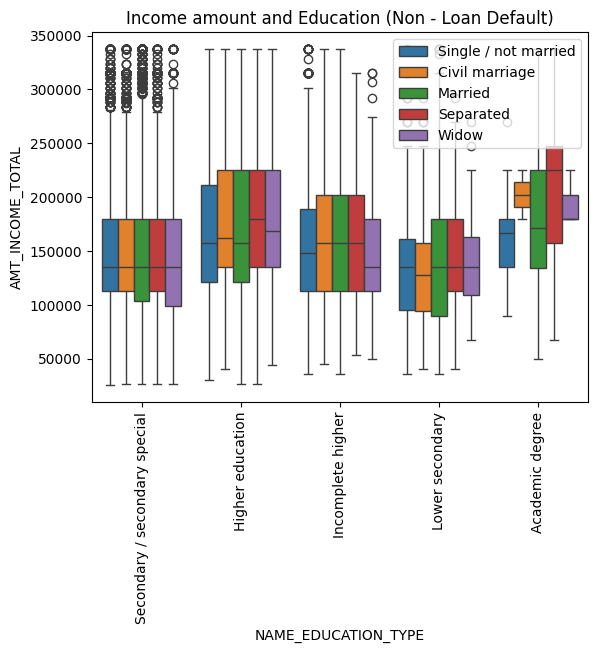

In [425]:
sns.boxplot(data=df_target_0, x = df_target_0.NAME_EDUCATION_TYPE,y =  df_target_0.AMT_INCOME_TOTAL, hue="NAME_FAMILY_STATUS",orient="v")
plt.xticks(rotation = 90)
plt.title("Income amount and Education (Non - Loan Default)")
plt.legend(loc="upper right")
plt.show()

<b>PREVIOU APPLICATION<b>

In [446]:
df2 = pd.read_csv("C:\\Users\\ronit\\Downloads\\previous_application.csv") 

In [447]:
df2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [448]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [449]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [450]:
emptycol1=df2.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [451]:
emptycol1

AMT_ANNUITY                   372235
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64

In [452]:
emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
df2.drop(labels=emptycol1,axis=1,inplace=True)

df2.shape

(1670214, 22)

In [453]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,...,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,...,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,...,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [456]:
# Removing the column values of 'XNA' and 'XAP'

df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df2.shape

(69635, 22)

In [467]:
new_df = pd.merge(left=df, right=df2, how='inner', on='SK_ID_CURR', suffixes=('_x', '_y'))


In [468]:
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100060,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [469]:
new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [471]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [476]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,INCOME_TYPE,AGE,AGE_GROUP,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,2,Business Entity,0.262949,0.139376,0.0,High,26.0,Young,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2,2,Government,0.555912,0.729567,0.0,Low,52.0,Senior,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,2,Business Entity,0.650442,0.535276,0.0,Medium,52.0,Senior,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2,2,Religion,0.322738,0.535276,0.0,Medium,55.0,Senior,8
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,2,2,Other,0.354225,0.621226,1.0,Low,46.0,Middle Aged,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307497,456241,0,Cash loans,F,Y,Y,0,180000.0,270126.0,12028.5,...,2,2,Trade,0.651306,0.524496,0.0,Medium,46.0,Middle Aged,3
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,...,2,2,Bank,0.501221,0.609276,0.0,Medium,33.0,Young,1
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,1,1,Services,0.681632,0.535276,0.0,Medium,26.0,Young,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,2,2,Business Entity,0.514163,0.661024,0.0,Medium,33.0,Young,13
